![Patrones](https://drive.google.com/uc?export=view&id=1FVBEDeOK1dmp3cpfhbq82lA-eI0ZZJW1)

## **`Challenge 4 `**
    
## <center>Acerca de los datos </center>

​**Este conjunto de datos contiene 2126 registros de características extraídas de exámenes de Cardiotocograma, que luego fueron clasificados por un obstetra experto en 3 clases: "Normal", "Suspect" y "Pathological". El conjunto de datos contiene las siguientes características:**
    
* **baseline value:** Valor de línea base de la frecuencia cardíaca fetal (FHR) (latidos por minuto)   
* **accelerations:** Número de aceleraciones por segundo
* **fetal_movement:** Número de movimientos fetales por segundo    
* **uterine_contractions:** Número de contracciones uterinas por segundo
* **light_decelerations:** Número de desaceleraciones leves (LDs) por segundo
* **severe_decelerations:** Número de desaceleraciones severas (SDs) por segundo
* **prolongued_decelerations:** Número de desaceleraciones prolongadas (PDs) por segundo
* **abnormal_short_term_variability:** Porcentaje de tiempo con variabilidad anormal a corto plazo
* **mean_value_of_short_term_variability:** Valor medio de la variabilidad a corto plazo
* **percentage_of_time_with_abnormal_long_term_variability:** Porcentaje de tiempo con variabilidad anormal a largo plazo
* **mean_value_of_long_term_variability:** Valor medio de la variabilidad a largo plazo
* **histogram_width:** Ancho del histograma creado usando todos los valores de un registro
* **histogram_min:** Valor mínimo del histograma
* **histogram_max:** Valor máximo del histograma
* **histogram_number_of_peaks:** Número de picos en el histograma del examen
* **histogram_number_of_zeroes:** Número de ceros en el histograma del examen
* **histogram_mode:** Modo del histograma
* **histogram_mean:** Media del histograma
* **histogram_median:** Mediana del histograma
* **histogram_variance:** Varianza del histograma
* **histogram_tendency:** Tendencia del histograma
* **fetal_health:** Codificado como 1-Normal(Normal); 2-Sospechoso(Suspect); 3-Patológic(Pathological).



<br>

Datos extraidos de :

https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification <br>

<br>


> Nota <br> Si la base de datos es usada para investigación citar a: <br>
    `Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318`. [<small>DOI: 10.1002/1520-6661(200009/10)9:5<311::AID-MFM12>3.0.CO;2-9</small>](https://doi.org/10.1002/1520-6661(200009/10)9:5%3C311::AID-MFM12%3E3.0.CO;2-9)
<br>

___


### Sobre el Challenge

Implementar cada paso en Python

1.	Utilizar todos los conocimientos adquiridos en el curso.
2.	Escoger las variables usadas para clasificar, y la variable objetivo.

  a. Si la variable objetivo no tiene categorías, crear categorías basadas en intervalos de valores. Por ejemplo, si nuestra variable va del 1 al 10,  podemos crear 5 categorías: categoría1(1-2), categoría2(3-4), categoría3(5-6), categoría4(7-8),categoría5(9-10)<br>
  b. Crear al menos 2 de los modelos de clasificación visto en clase y un modelo de clasificación k-vecinos, donde k es nuestro número de categorías.<br>
  c. 	Dividir el conjunto en entrenamiento y prueba.<br>
  d.	Evaluar nuestro modelo (incluir validación cruzada).<br>
  e.	Generar gráficos de nuestros resultados.<br>



**Todas estas salidas deberán ser reportadas en un documento.**


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("https://github.com/ulewis/Ejemplos/raw/main/Datos/fetal_health.csv")
df.head()  # vemos los 5 primeros datos del dataframe

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [13]:
feature_names=['baseline value','accelerations','fetal_movement','uterine_contractions','light_decelerations','severe_decelerations','prolongued_decelerations','abnormal_short_term_variability','mean_value_of_short_term_variability','percentage_of_time_with_abnormal_long_term_variability','mean_value_of_long_term_variability','histogram_width','histogram_min','histogram_max','histogram_number_of_peaks','histogram_number_of_zeroes','histogram_mode','histogram_mean','histogram_median','histogram_variance','histogram_tendency']
classes=['1','2','3']

No se consideró necesario eliminar ningún feature

Se obtienen las variables

In [14]:
y=df.fetal_health.tolist()
X=df.iloc[:,:-1]
x = X.values.tolist()

Se distribuyen en data de testeo y de entrenamiento

In [15]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)

#### Modelos

MODELO SVC

In [16]:
svc_model = SVC(kernel='linear')
svc_model.fit(x_train, y_train)
y_pred_svc = svc_model.predict(x_test)
accuracy_SVC = accuracy_score(y_test, y_pred_svc)

print("Accuracy:", accuracy_SVC)

cv_scores = cross_val_score(svc_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy: 0.8732394366197183
Cross-Validation Scores: [0.83802817 0.84470588 0.88470588 0.86588235 0.68235294]
Mean CV Accuracy: 0.8231350455675228


MODELO RANDOM FOREST

In [17]:
rf_clf= RandomForestClassifier(n_estimators=50,random_state=0)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

rf_score= rf_clf.score(x_test,y_test)
print(f"Accuracy:{rf_score:.2f}")

cv_scores = cross_val_score(rf_clf, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy:0.95
Cross-Validation Scores: [0.85680751 0.90823529 0.91764706 0.86588235 0.76      ]
Mean CV Accuracy: 0.8617144435238885


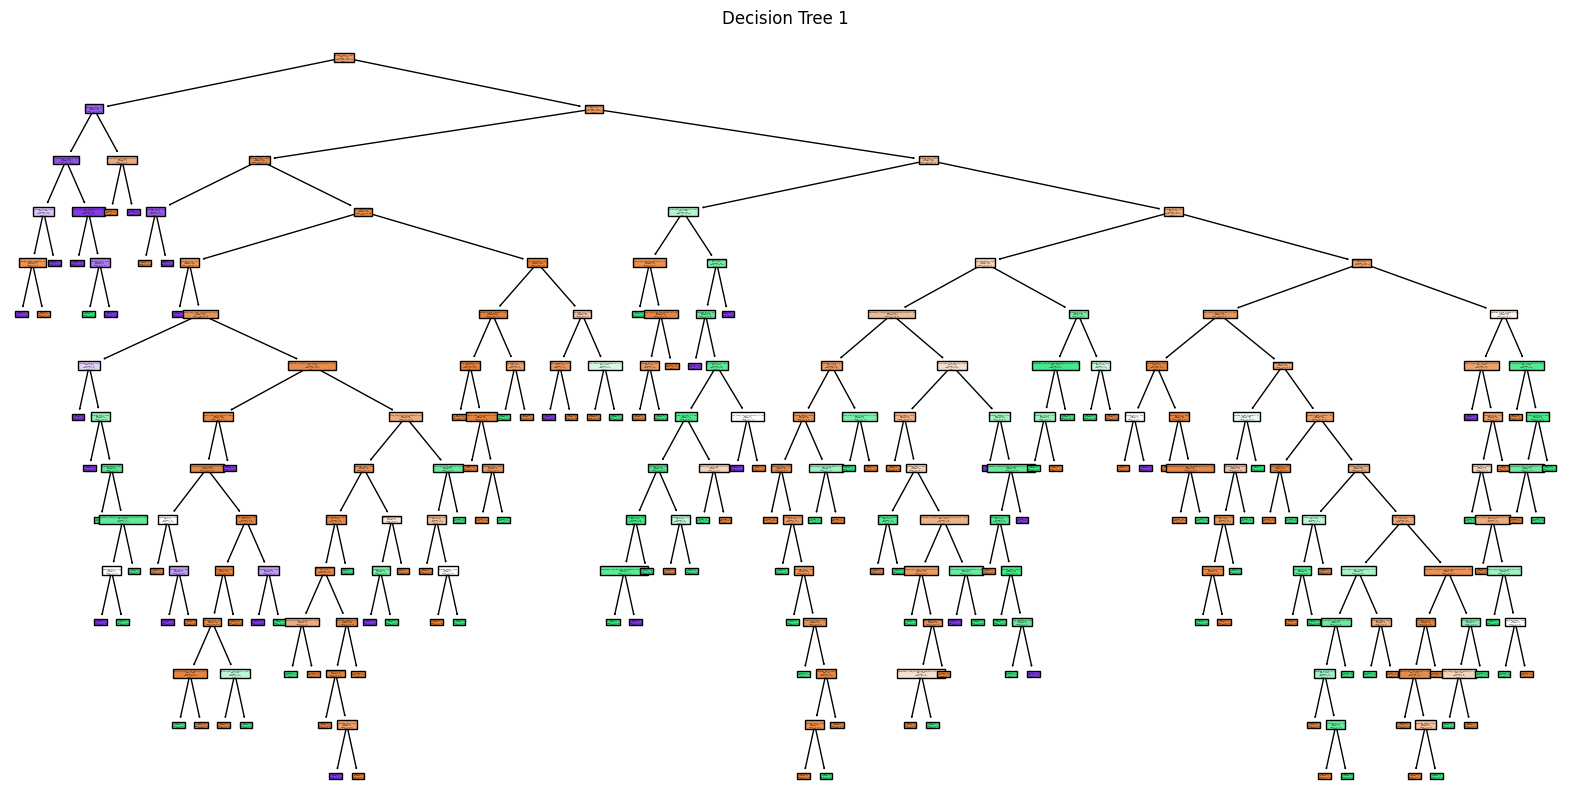

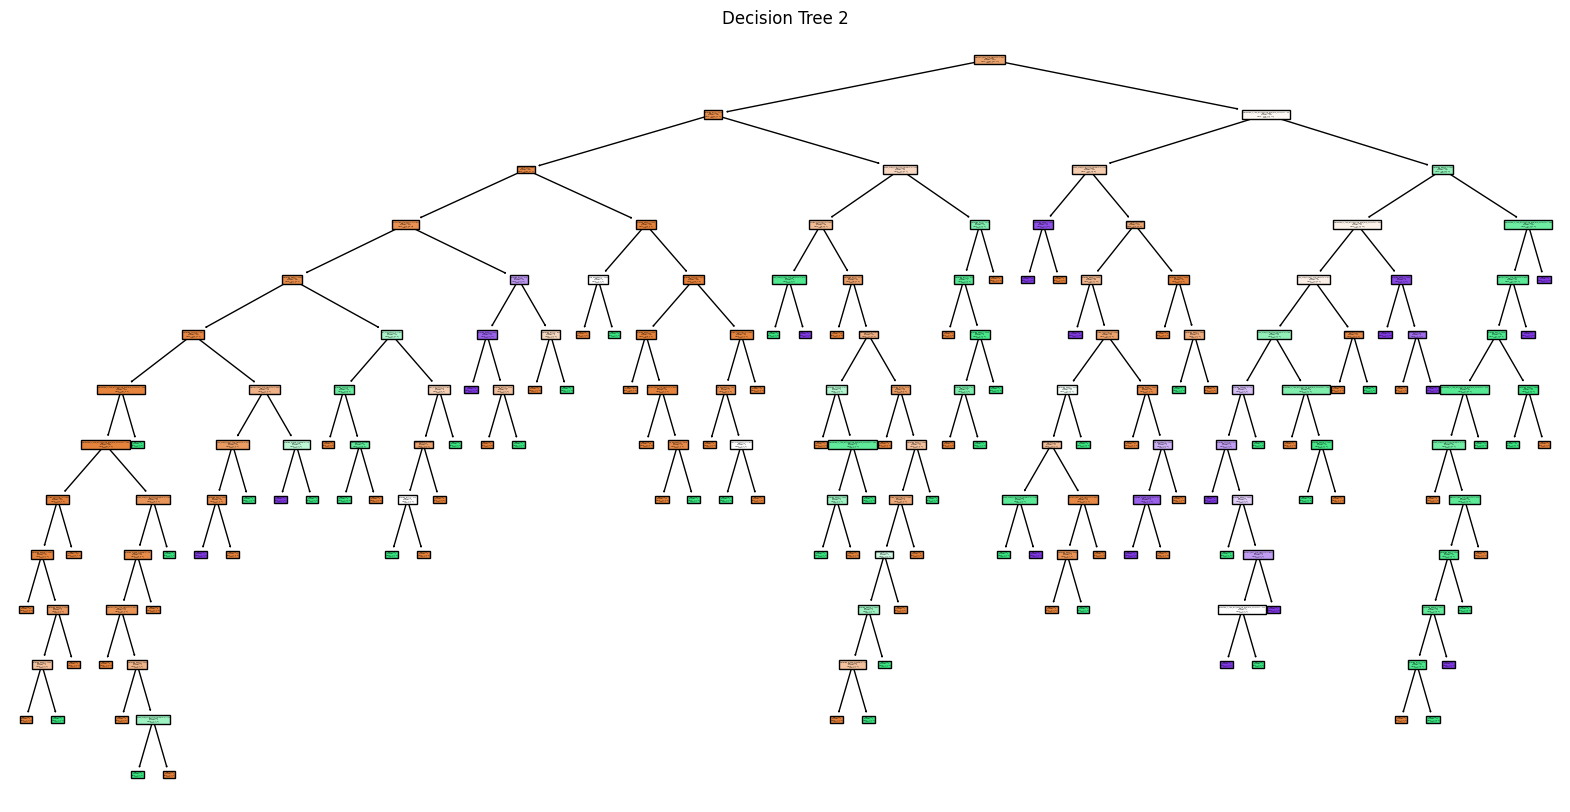

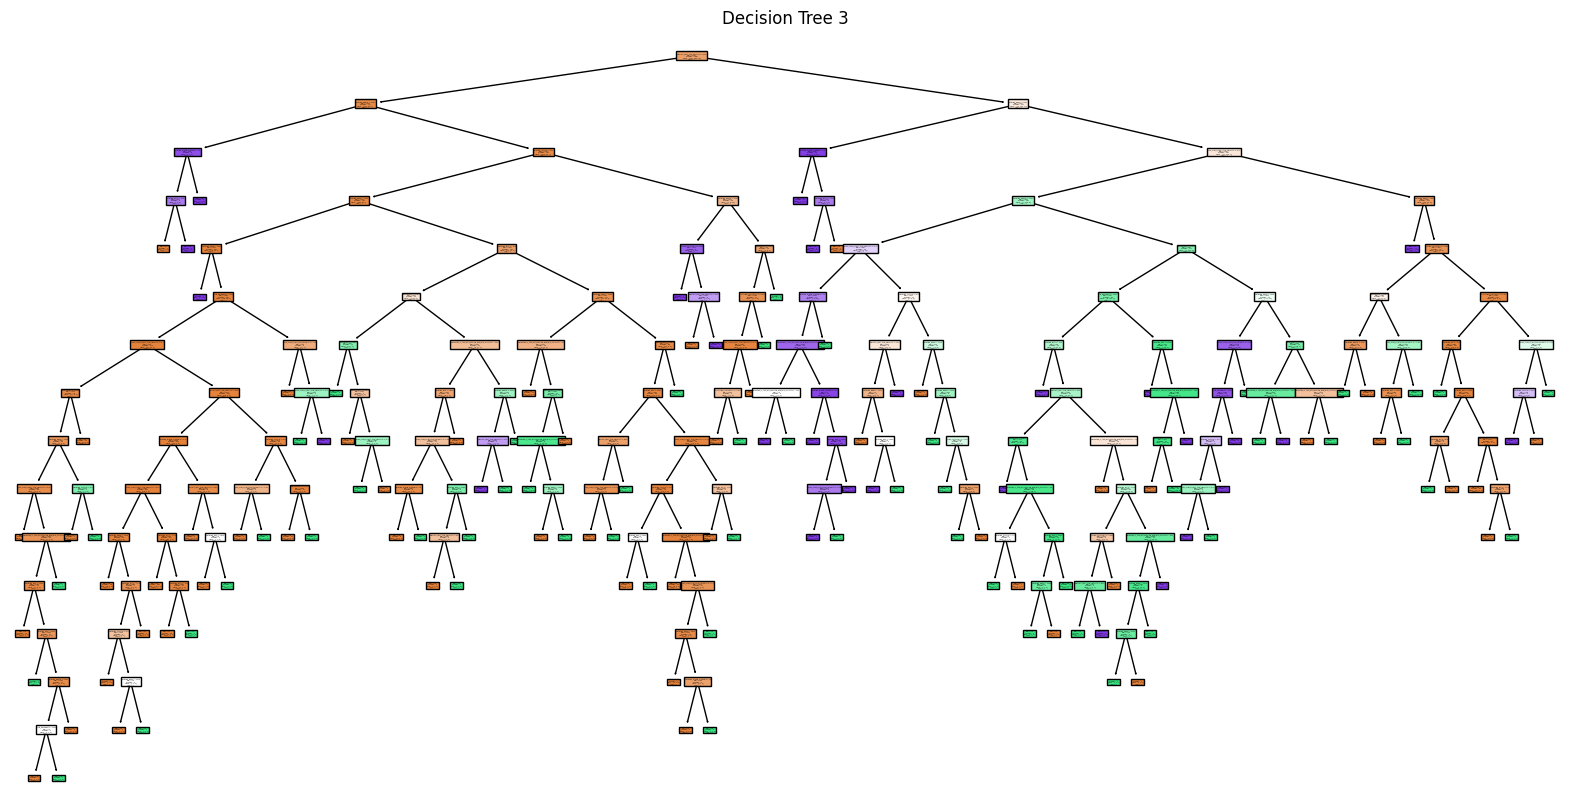

In [18]:
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf_clf.estimators_[i],filled=True, feature_names=feature_names, class_names=classes)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

MODELO KNN

In [19]:
from sklearn.metrics import accuracy_score
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy)

cv_scores = cross_val_score(knn_model, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy: 0.8873239436619719
Cross-Validation Scores: [0.81220657 0.82117647 0.89882353 0.83529412 0.70823529]
Mean CV Accuracy: 0.8151471969069318


#### CLASSIFICATION REPORT 

PARA SVC

In [20]:
print(classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         1.0       0.93      0.95      0.94       333
         2.0       0.63      0.53      0.58        64
         3.0       0.71      0.76      0.73        29

    accuracy                           0.87       426
   macro avg       0.76      0.75      0.75       426
weighted avg       0.87      0.87      0.87       426



PARA RANDOM FOREST

In [21]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         1.0       0.96      0.98      0.97       333
         2.0       0.89      0.80      0.84        64
         3.0       0.90      0.90      0.90        29

    accuracy                           0.95       426
   macro avg       0.92      0.89      0.90       426
weighted avg       0.95      0.95      0.95       426



PARA KNN

In [22]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

         1.0       0.92      0.95      0.94       333
         2.0       0.68      0.62      0.65        64
         3.0       0.95      0.72      0.82        29

    accuracy                           0.89       426
   macro avg       0.85      0.77      0.80       426
weighted avg       0.89      0.89      0.88       426



De los 3 modelos analizados, el que presenta mejor precisión es el de Random Forest

Asimismo, de la validación cruzada se obtuvo que el mejor modelo es también el Random Forest

## CHALLENGE 6


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
import pandas as pd

lista=[1,2,3,4,5,6,7,8,9]


param_grid = {'max_depth': lista,
              'min_samples_split': lista,
              'min_samples_leaf':lista}
              
base_estimator = RandomForestClassifier(random_state=0)

sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=100).fit(x, y)
sh.best_estimator_

c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
405 fits failed out of a total of 3645.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\FABRICIO\AppData\Local\Programs\Python\Python310\lib\site-packages

RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=9,
                       n_estimators=64, random_state=0)

In [31]:
rf_clf= RandomForestClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=9, n_estimators=64,random_state=0)
rf_clf.fit(x_train,y_train)
y_pred_rf = rf_clf.predict(x_test)

rf_score= rf_clf.score(x_test,y_test)
print(f"Accuracy:{rf_score:.2f}")

cv_scores = cross_val_score(rf_clf, x, y, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Accuracy:0.91
Cross-Validation Scores: [0.87089202 0.90352941 0.89176471 0.88470588 0.80235294]
Mean CV Accuracy: 0.8706489919911627


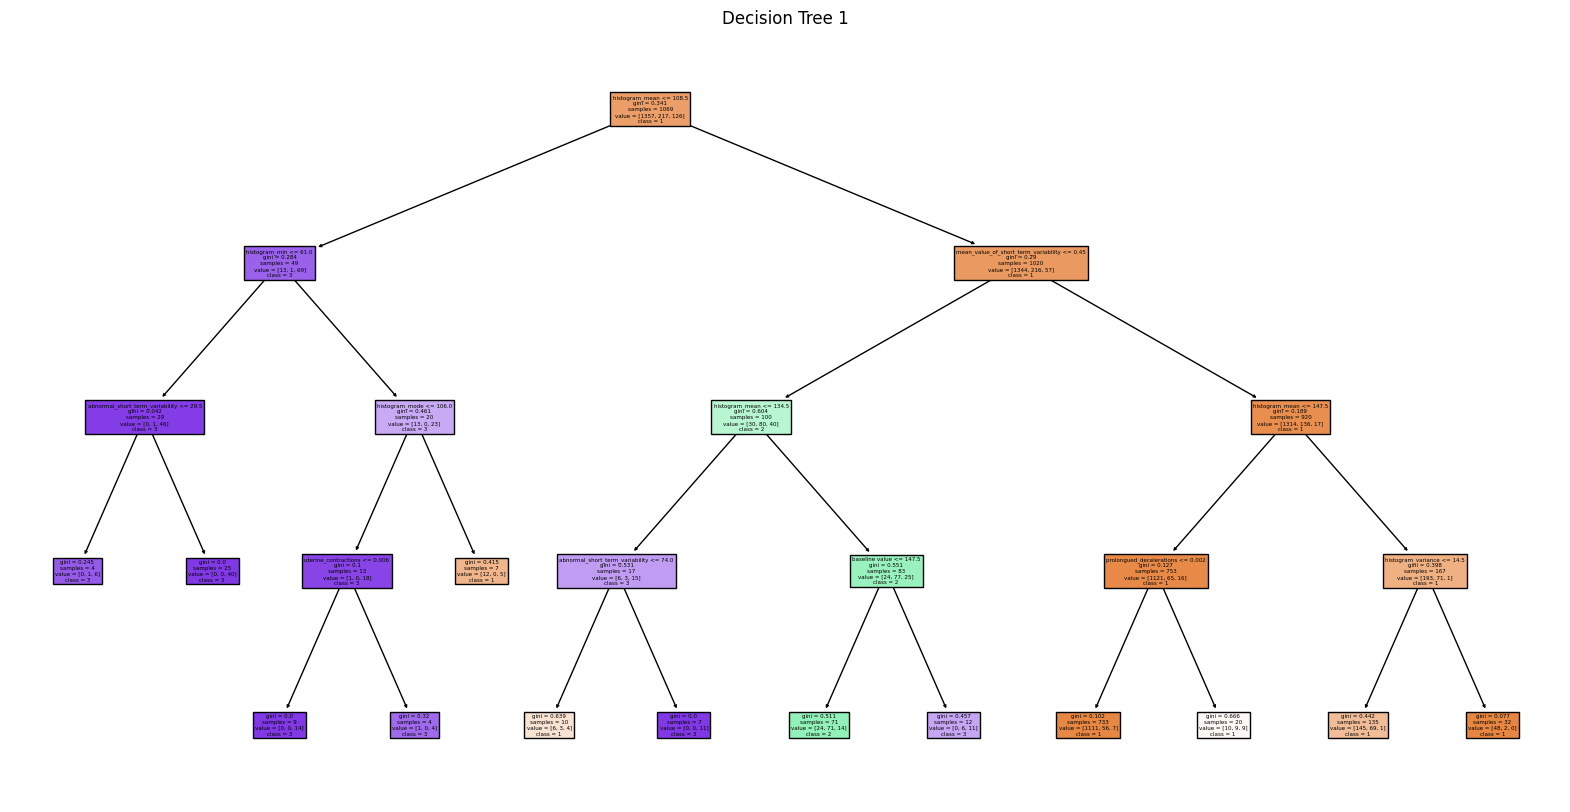

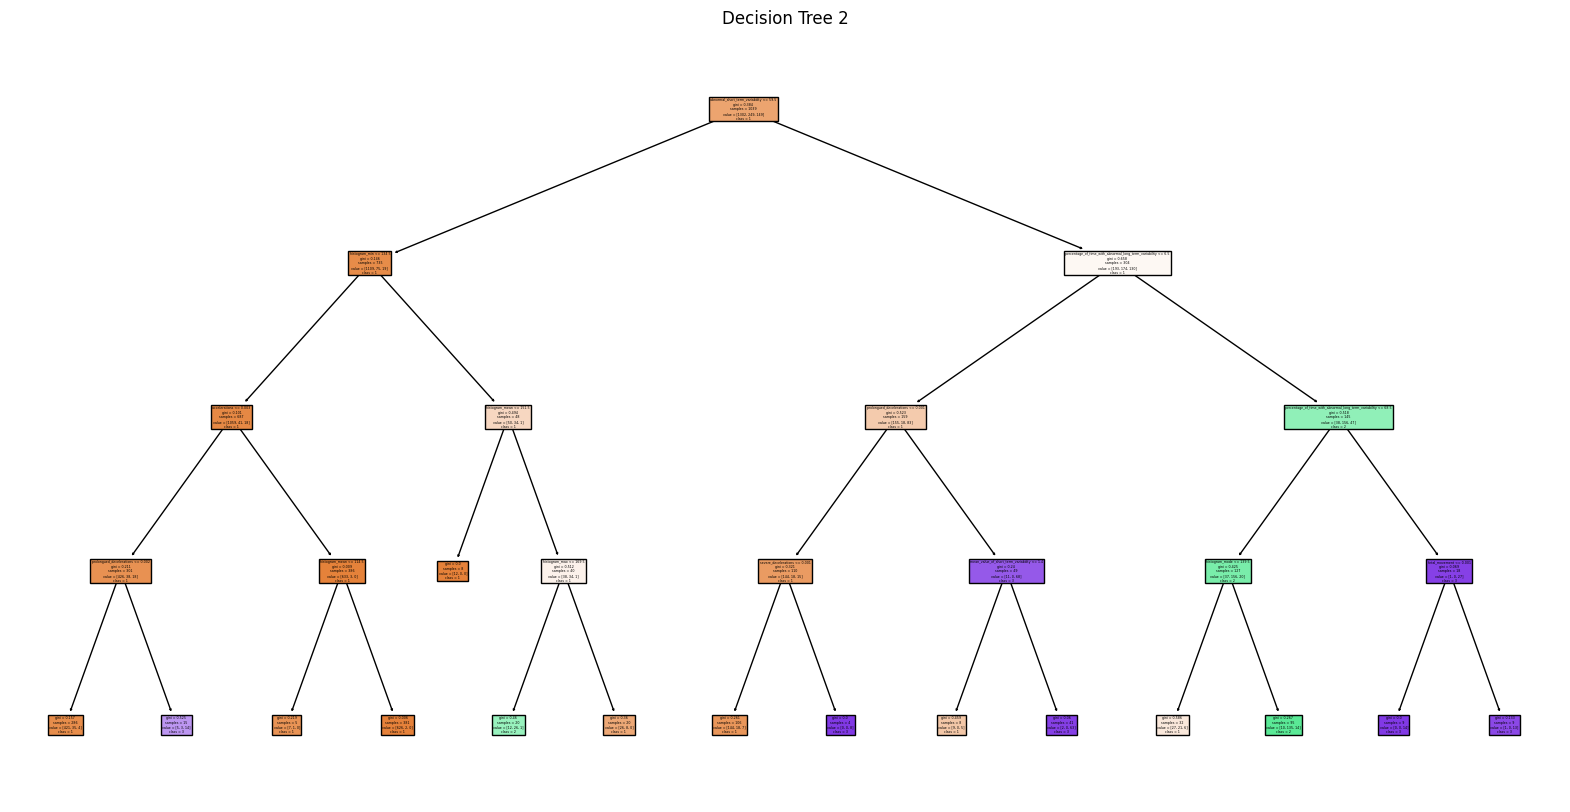

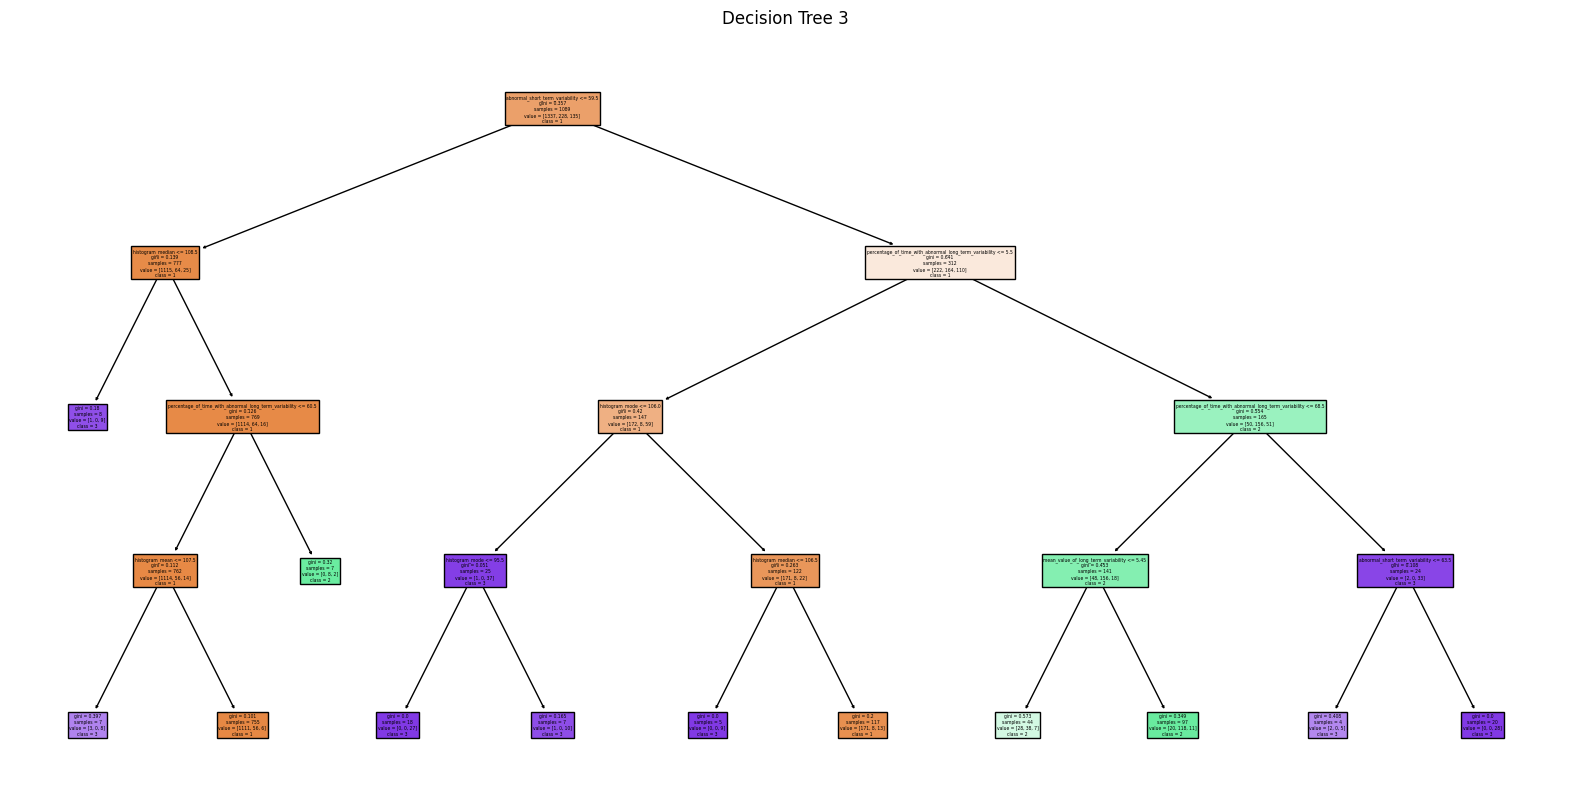

In [32]:
for i in range(3):
    plt.figure(figsize=(20,10))
    plot_tree(rf_clf.estimators_[i],filled=True, feature_names=feature_names, class_names=classes)
    plt.title(f"Decision Tree {i+1}")
    plt.show()

In [47]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

from sklearn.model_selection import GridSearchCV

parameters = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.001, 0.01, 0.1],
    'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

grid_search = GridSearchCV(pipe, parameters, cv=5)
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Mejor combinación de hiperparámetros:", best_params)


# An estimator's parameter can be set using '__' syntax
pipe.set_params(svc__C=10, svc__gamma=0.1, svc__kernel='rbf').fit(x_train, y_train).score(x_test, y_test)


Mejor combinación de hiperparámetros: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


0.931924882629108